In [1]:
# Functions to create a tiling (base + subdivisions)

phi = (1+sqrt(5))/2   # = golden ratio
l = 1/phi

def star():
    """
    The 5 base darts, forming a star.
    """
    darts = [(0, CDF(0), CDF(exp(2*k*pi/5*I)), CDF(l*exp((2*k+1)*pi/5*I)), CDF(exp(2*(k+1)*pi/5*I)), CDF(l*exp((2*k+1)*pi/5*I)/2)) for k in range(5)]
    return darts

def star_empire():
    return iteration(star(),1)

def subdivide(t):
    """
    Function dividing a given tile t :
     - a dart subdivides into 1 kite and 2 half-darts
     - a kite subdivides into 2 kites and 2 half-darts
    Each half-dart is completed into a whole dart
    """
    code, A, B, C, D, v = t
    if code == 0:
        M = CDF(A + (B-A)/phi)
        N = CDF(A + (D-A)/phi)
        E = CDF(A + exp(2*I*pi/5)*(C-A))
        F = CDF(A + exp(-2*I*pi/5)*(C-A))
        d1 = CDF((D+N)/2)
        d2 = CDF((B+M)/2)
        dart1 = (0, D,E,N,C, d1)
        dart2 = (0, B,C,M,F, d2)
        kite = (1, A,M,C,N, v)
        return (dart1, dart2, kite)
    else:
        P = CDF(B + (A-B)/phi)
        Q = CDF(A + (C-A)/phi)
        R = CDF(D + (A-D)/phi)
        S = CDF(A + exp(2*I*pi/5)*(Q-A))
        T = CDF(A + exp(-2*I*pi/5)*(Q-A))
        return ((0, A,Q,R,S,CDF((A+R)/2)), (0, A,T,P,Q,CDF((A+P)/2)), (1, B,C,Q,P,CDF((B+Q)/2)), (1, D,R,Q,C,CDF((D+Q)/2)))

def iteration(T,n):
    """
    Function that iteratively divides all tiles of the tiling T, n times
    """
    for k in range(n):
        print "Iteration {}".format(k+1)
        T1 = []
        for t in T:
            S = subdivide(t)
            for s in S:
                T1.append(s)
        T = list(T1)
        # remove doubles
        i = 0
        while i < len(T)-1:
            for j in range(i+1,len(T)):
                if T[i][0] == T[j][0] and all([round(T[i][k].real(),n+2) == round(T[j][k].real(),n+2) and round(T[i][k].imag(),n+2) == round(T[j][k].imag(),n+2) for k in range(1,4)]):
                    T.pop(j)
                    break
            i+=1
    return T

In [2]:
# Functions to create and plot the corresponding graph

def adjacent_in_Penrose(u,v):
    """
    Simple adjacency function for a Penrose tiling.
    
    INPUT: 2 tuples of the form (code,A,B,C,D,M) where A,B,C,D are 4 points
    """
    zu = set([(round(u[k].real(),9),round(u[k].imag(),9)) for k in range(1,5)])
    zv = set([(round(v[k].real(),9),round(v[k].imag(),9)) for k in range(1,5)])
    if len(zu.intersection(zv)) == 2:
        return True
    else:
        return False

def Penrose_plot(G):
    g = Graphics()
    for t in G.vertices():
        g += polygon(t[1:5], color='black', fill=False, thickness=1, axes=False)
    return g

Iteration 1
Iteration 2
After 2 iterations there are 30 tiles in the tiling


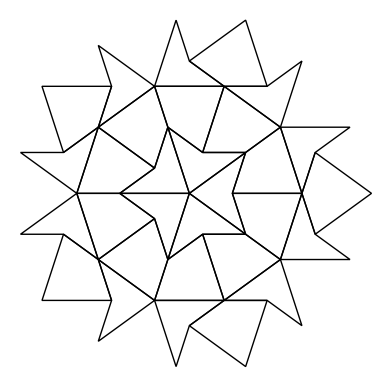

In [5]:
n = 2
P = iteration(star(),n)
print "After {} iterations there are {} tiles in the tiling".format(n, len(P))

#P.sort()
corresp = dict([(P[k],k) for k in range(len(P))])
G = Graph([P, adjacent_in_Penrose])
Penrose_plot(G)

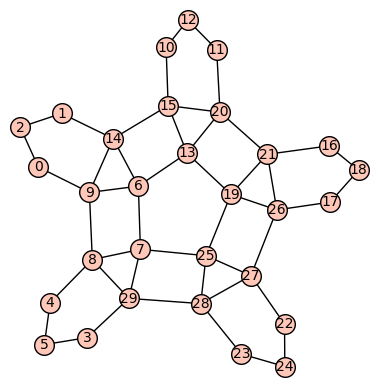

In [9]:
G_unlabelled = copy(G)
G_unlabelled.relabel(perm=corresp)
S = plot(G_unlabelled, layout='spring')
S.show()

In [10]:
S.save('kd_2sub_graph.png')#, xmin=-0.9, xmax=1, ymin=-1, ymax=1)

In [8]:
from time import time
from IMT import *

G_unlabelled = copy(G)
G_unlabelled.relabel()
start = time()
L = ComputeL(G_unlabelled)
end = time()
print "Running time =", end-start
print L

Running time = 210.773766994
{0: 0, 1: 0, 2: 2, 3: 2, 4: 3, 5: 3, 6: 4, 7: 4, 8: 5, 9: 5, 10: 6, 11: 6, 12: 7, 13: 7, 14: 8, 15: 8, 16: 9, 17: 9, 18: 10, 19: 10, 20: 10, 21: 10, 22: 8, 23: 8, 24: 6, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0}


In [9]:
latex(L.values())

\left[0, 0, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 10, 10, 8, 8, 6, 0, 0, 0, 0, 0, 0\right]